# Deep Learning: Linear Stochastic Gradient Descent

In [235]:
%matplotlib inline
import numpy as np

from matplotlib import pyplot as plt

In [236]:
# Create a random X axis points.
np.random.seed(1)
X = np.random.random(4)
print X

[  4.17022005e-01   7.20324493e-01   1.14374817e-04   3.02332573e-01]


In [237]:
def lin(a, b, x): return a*x + b 

In [238]:
# We define the slope "a"
a = 10.
# We define the y-intercept var "b"
b = 3.
# We define the len of the X.
n = len(X)

In [239]:
# Create y axis points which follows a linear form.
y = lin(a, b, X)

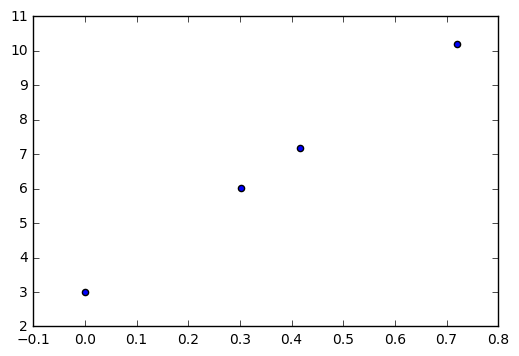

In [240]:
plt.scatter(X, y)

In [241]:
# We choose the Least Square Errors (lse) as cost function.
# But we return the sum of all those errors for measuring the performance.
def sse(y, y_pred): return ((y-y_pred)**2).sum()

In [242]:
# The loss function is the comparison of a perfect regression line with a line created using
# our guessed "a" and "b" using the cost function.
def loss(y, a, b, X): return sse(y, lin(a, b, X))

In [243]:
# This function represents the average loss per point.
def avg_loss(y, a, b, X): return np.sqrt(loss(y, a, b, X)/n)

In [244]:
# We define the random numbers that will conform the initial approximation line.
a_guess = -1
b_guess = 2

In [245]:
# As we can see we get a really bad approximation at the beginning.
avg_loss(y, a_guess, b_guess, X)

5.7131690554944567

In [246]:
lr=0.6 # This is the learning rate

In [247]:
# The partial derivatives of the cost function (lse) are:
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

# This tells us how much is changing df with regards of "b" and "a" respectively.

In [251]:
def update():
    print '-----------------------------------------------'
    global a_guess, b_guess
    # We calculate the current "guessed" line based on the iterative process.
    y_pred = lin(a_guess, b_guess, X)
    # Now, in order to iterate again we need to calculate how much the
    # derivative of the cost function changes depending on "a" and "b".
    # d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db
    # d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
    dydb = 2 * (y_pred - y)
    dyda = X * dydb
    print 'dy/da: {}'.format(dyda)
    print 'dy/db: {}'.format(dydb)
    print 'Current a_guess = {}'.format(a_guess)
    print 'Current b_guess = {}'.format(b_guess)
    # Because these changes always tell us how to go higher instead than
    # lower, we need to substract it from the previous
    # guesses in order to approach the minimum. Please notice how the speed is
    # controlled by the defined learning rate.
    print 'Formula a: a_guess -= lr * dyda.mean()'
    print 'Formula b: b_guess -= lr * dydb.mean()'
    print '* Where:'
    print 'Learning rate = {}'.format(lr)
    print 'dyda.mean() = {}'.format(dyda.mean())
    print 'dydb.mean() = {}'.format(dydb.mean())
    print '* Result:'
    a_guess -= lr * dyda.mean()
    b_guess -= lr * dydb.mean()
    print 'New a_guess = {}'.format(a_guess)
    print 'New b_guess = {}'.format(b_guess)


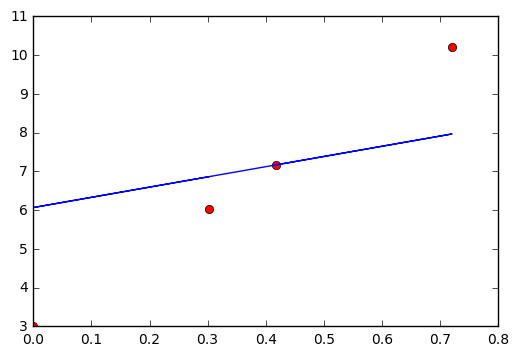

In [252]:
plt.plot(X, y, 'ro')
line, = plt.plot(X, lin(a_guess, b_guess, X))

In [253]:
# We can see how why are getting better.
for i in range(3):
    update()

avg_loss(y, a_guess, b_guess, X)

-----------------------------------------------
dy/da: [ -1.99349856e-03  -3.22108978e+00   7.01723736e-04   5.09227288e-01]
dy/db: [ -4.78031984e-03  -4.47172046e+00   6.13529929e+00   1.68432823e+00]
Current a_guess = 2.63616305654
Current b_guess = 6.06849188454
Formula a: a_guess -= lr * dyda.mean()
Formula b: b_guess -= lr * dydb.mean()
* Where:
Learning rate = 0.6
dyda.mean() = -0.678288566022
dydb.mean() = 0.835781686277
* Result:
New a_guess = 3.04313619615
New b_guess = 5.56702287278
-----------------------------------------------
dy/da: [ -2.78689481e-01  -3.52120043e+00   5.87023531e-04   2.80405202e-01]
dy/db: [-0.66828483 -4.88835305  5.13245437  0.92747268]
Current a_guess = 3.04313619615
Current b_guess = 5.56702287278
Formula a: a_guess -= lr * dyda.mean()
Formula b: b_guess -= lr * dydb.mean()
* Where:
Learning rate = 0.6
dyda.mean() = -0.879724421659
dydb.mean() = 0.125822292219
* Result:
New a_guess = 3.57097084915
New b_guess = 5.49152949745
------------------------

1.5499545846314433

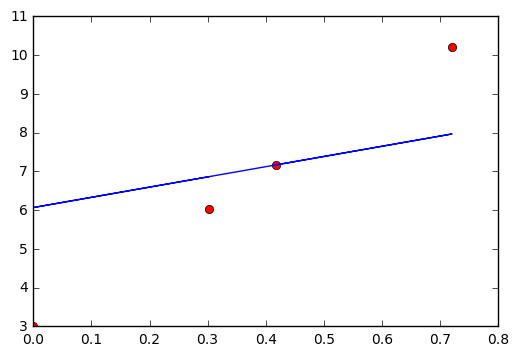

In [230]:
plt.plot(X, y, 'ro')
line, = plt.plot(X, lin(a_guess, b_guess, X))

In [231]:
# And even better!
for i in range(3):
    update()

avg_loss(y, a_guess, b_guess, X)

-----------------------------------------------
Learning rate: 0.6
dy/da: [ -1.99349856e-03  -3.22108978e+00   7.01723736e-04   5.09227288e-01]
dy/da - mean: -0.678288566022
dy/db: [ -4.78031984e-03  -4.47172046e+00   6.13529929e+00   1.68432823e+00]
dy/db - mean: 0.835781686277
Current a_guess 2.63616305654
Current b_guess 6.06849188454
New a_guess 3.04313619615
New b_guess 5.56702287278
-----------------------------------------------
Learning rate: 0.6
dy/da: [ -2.78689481e-01  -3.52120043e+00   5.87023531e-04   2.80405202e-01]
dy/da - mean: -0.879724421659
dy/db: [-0.66828483 -4.88835305  5.13245437  0.92747268]
dy/db - mean: 0.125822292219
Current a_guess 3.04313619615
Current b_guess 5.56702287278
New a_guess 3.57097084915
New b_guess 5.49152949745
-----------------------------------------------
Learning rate: 0.6
dy/da: [ -1.58065625e-01  -3.08220752e+00   5.69768258e-04   3.31250426e-01]
dy/da - mean: -0.727113238422
dy/db: [-0.37903425 -4.27891534  4.98158836  1.09564915]
dy/db

1.5499545846314433

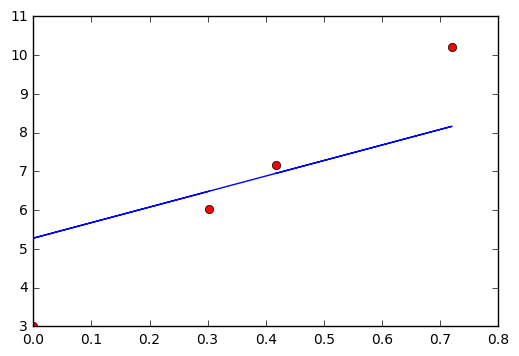

In [232]:
plt.plot(X, y, 'ro')
line, = plt.plot(X, lin(a_guess, b_guess, X))

In [233]:
# And even better!
for i in range(15):
    update()

avg_loss(y, a_guess, b_guess, X)

-----------------------------------------------
Learning rate: 0.6
dy/da: [ -1.83887506e-01  -2.93618147e+00   5.21080434e-04   2.82275465e-01]
dy/da - mean: -0.709318108107
dy/db: [-0.44095396 -4.07619274  4.55590178  0.93365879]
dy/db - mean: 0.24310346678
Current a_guess 4.0072387922
Current b_guess 5.27863631039
New a_guess 4.43282965706
New b_guess 5.13277423032
-----------------------------------------------
Learning rate: 0.6
dy/da: [ -1.57516139e-01  -2.70466710e+00   4.87725671e-04   2.71880002e-01]
dy/da - mean: -0.647453877669
dy/db: [-0.37771661 -3.75478985  4.26427497  0.8992746 ]
dy/db - mean: 0.257760775512
Current a_guess 4.43282965706
Current b_guess 5.13277423032
New a_guess 4.82130198366
New b_guess 4.97811776502
-----------------------------------------------
Learning rate: 0.6
dy/da: [ -1.51390050e-01  -2.52434155e+00   4.52358225e-04   2.49381242e-01]
dy/da - mean: -0.606474498923
dy/db: [-0.36302653 -3.50445052  3.9550509   0.82485734]
dy/db - mean: 0.22810779971

0.52077385521080499

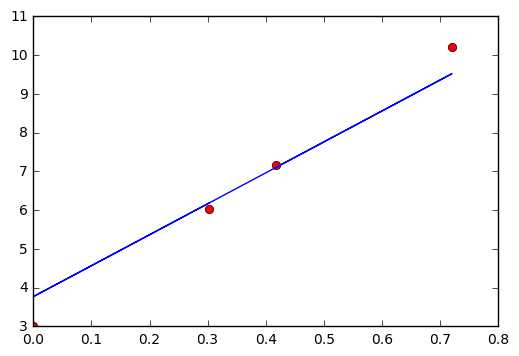

In [234]:
plt.plot(X, y, 'ro')
line, = plt.plot(X, lin(a_guess, b_guess, X))